**How to use the dataset**

This dataset contains job postings from Glassdoor.com from 2017, It can be used to analyze salaries based on company size and other information.

**Research Ideas**

1. Identify which factors most affect data science salaries

2. Determine which states and cities offer the highest paying data science jobs - California

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline
import seaborn as sns 

In [2]:
salary_cleaned_df = pd.read_csv('salary_data_cleaned.csv', encoding='ISO-8859-1')
eda_df = pd.read_csv('eda_data.csv', encoding='ISO-8859-1')
glassdoor_df = pd.read_csv('glassdoor_jobs.csv', encoding='ISO-8859-1')

In [33]:
glassdoor_df.head()

,Unnamed: 0,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,Industry,Sector,Revenue,Competitors
0,0,Data Scientist,$53K-$91K (Glassdoor est.),"Data Scientist\nLocation: Albuquerque, NM\nEdu...",3.8,Tecolote Research\n3.8,"Albuquerque, NM","Goleta, CA",501 to 1000 employees,1973,Company - Private,Aerospace & Defense,Aerospace & Defense,$50 to $100 million (USD),-1
1,1,Healthcare Data Scientist,$63K-$112K (Glassdoor est.),What You Will Do:\n\nI. General Summary\n\nThe...,3.4,University of Maryland Medical System\n3.4,"Linthicum, MD","Baltimore, MD",10000+ employees,1984,Other Organization,Health Care Services & Hospitals,Health Care,$2 to $5 billion (USD),-1
2,2,Data Scientist,$80K-$90K (Glassdoor est.),"KnowBe4, Inc. is a high growth information sec...",4.8,KnowBe4\n4.8,"Clearwater, FL","Clearwater, FL",501 to 1000 employees,2010,Company - Private,Security Services,Business Services,$100 to $500 million (USD),-1
3,3,Data Scientist,$56K-$97K (Glassdoor est.),*Organization and Job ID**\nJob ID: 310709\n\n...,3.8,PNNL\n3.8,"Richland, WA","Richland, WA",1001 to 5000 employees,1965,Government,Energy,"Oil, Gas, Energy & Utilities",$500 million to $1 billion (USD),"Oak Ridge National Laboratory, National Renewa..."
4,4,Data Scientist,$86K-$143K (Glassdoor est.),Data Scientist\nAffinity Solutions / Marketing...,2.9,Affinity Solutions\n2.9,"New York, NY","New York, NY",51 to 200 employees,1998,Company - Private,Advertising & Marketing,Business Services,Unknown / Non-Applicable,"Commerce Signals, Cardlytics, Yodlee"


In [34]:
glassdoor_df.shape

(956, 15)

In [35]:
glassdoor_df.dtypes

Unnamed: 0             int64
Job Title             object
Salary Estimate       object
Job Description       object
Rating               float64
Company Name          object
Location              object
Headquarters          object
Size                  object
Founded                int64
Type of ownership     object
Industry              object
Sector                object
Revenue               object
Competitors           object
dtype: object

In [36]:
glassdoor_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 956 entries, 0 to 955
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         956 non-null    int64  
 1   Job Title          956 non-null    object 
 2   Salary Estimate    956 non-null    object 
 3   Job Description    956 non-null    object 
 4   Rating             956 non-null    float64
 5   Company Name       956 non-null    object 
 6   Location           956 non-null    object 
 7   Headquarters       956 non-null    object 
 8   Size               956 non-null    object 
 9   Founded            956 non-null    int64  
 10  Type of ownership  956 non-null    object 
 11  Industry           956 non-null    object 
 12  Sector             956 non-null    object 
 13  Revenue            956 non-null    object 
 14  Competitors        956 non-null    object 
dtypes: float64(1), int64(2), object(12)
memory usage: 112.2+ KB


In [37]:
glassdoor_df.isnull().sum()

Unnamed: 0           0
Job Title            0
Salary Estimate      0
Job Description      0
Rating               0
Company Name         0
Location             0
Headquarters         0
Size                 0
Founded              0
Type of ownership    0
Industry             0
Sector               0
Revenue              0
Competitors          0
dtype: int64

In [38]:
glassdoor_df.describe()

,Unnamed: 0,Rating,Founded
count,956.000000,956.000000,956.000000
mean,477.500000,3.601255,1774.605649
std,276.117729,1.067619,598.942517
min,0.000000,-1.000000,-1.000000
25%,238.750000,3.300000,1937.000000
50%,477.500000,3.800000,1992.000000
75%,716.250000,4.200000,2008.000000
max,955.000000,5.000000,2019.000000


In [41]:
# Removing unwanted columns
glassdoor_df.drop(labels=['Unnamed: 0'], axis='columns',inplace=True)
glassdoor_df.shape

(956, 14)

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


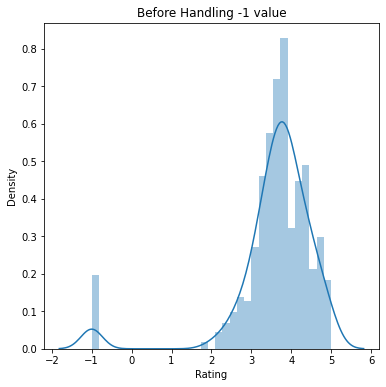

In [43]:
plt.figure(figsize=(6,6))
g = sns.distplot(a=glassdoor_df['Rating'])
p = plt.title('Before Handling -1 value')

In [45]:
# Handling -1(min value of Rating). Values in Rating column
glassdoor_df['Rating'] = glassdoor_df['Rating'].apply(lambda x: np.NaN if x==-1 else x)
glassdoor_df['Rating'] = glassdoor_df['Rating'].fillna(glassdoor_df['Rating'].mean())

In [46]:
glassdoor_df['Rating'].min()

1.9

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


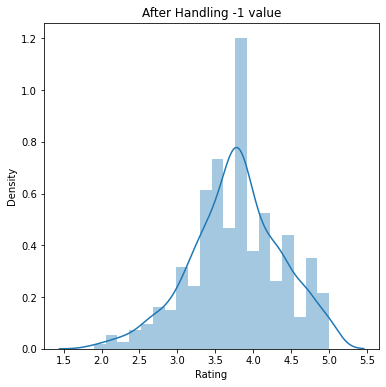

In [48]:
# Visualising 'Rating' column
plt.figure(figsize=(6,6))
g = sns.distplot(a=glassdoor_df['Rating'])
p = plt.title('After Handling -1 value')

Text(0, 0.5, 'Rating')

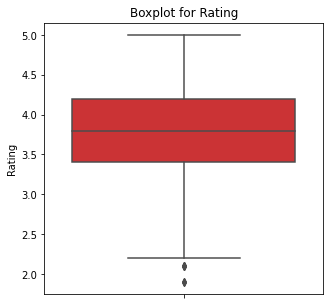

In [50]:
# Lets Check outliers in 'Rating' Column
plt.figure(figsize=(5,5))
sns.boxplot(y='Rating',data=glassdoor_df,orient='v',palette='Set1')
plt.title('Boxplot for Rating')
plt.ylabel('Rating')

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


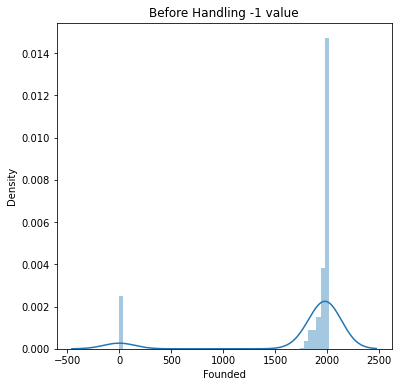

In [51]:
plt.figure(figsize=(6,6))
g = sns.distplot(a=glassdoor_df['Founded'])
p = plt.title('Before Handling -1 value')

In [55]:
# Handling -1(min value of Founded). Values in Founded column
glassdoor_df['Founded'] = glassdoor_df['Founded'].apply(lambda x: np.NaN if x==-1 else x)
glassdoor_df['Founded'] = glassdoor_df['Founded'].fillna(glassdoor_df['Founded'].mean())
glassdoor_df['Founded'] = glassdoor_df['Founded'].astype(int)

In [56]:
glassdoor_df['Founded'].min()

1744

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


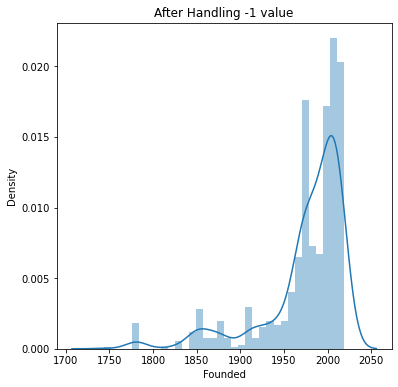

In [57]:
# Visualising 'Founded' column
plt.figure(figsize=(6,6))
g = sns.distplot(a=glassdoor_df['Founded'])
p = plt.title('After Handling -1 value')

Text(0, 0.5, 'Founded')

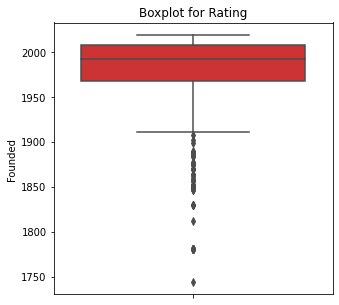

In [58]:
# Lets Check outliers in 'Founded' Column
plt.figure(figsize=(5,5))
sns.boxplot(y='Founded',data=glassdoor_df,orient='v',palette='Set1')
plt.title('Boxplot for Rating')
plt.ylabel('Founded')

In [59]:
# Job title column clean up
glassdoor_df['Job Title'].value_counts().nlargest(20)

Data Scientist                                            178
Data Engineer                                              68
Senior Data Scientist                                      42
Data Analyst                                               18
Senior Data Engineer                                       17
Business Intelligence Analyst                              13
Senior Data Analyst                                        12
Lead Data Scientist                                         8
Data Science Manager                                        7
Principal Data Scientist                                    6
Machine Learning Engineer                                   6
Marketing Data Analyst                                      6
Sr. Data Engineer                                           6
Analytics Manager                                           5
Lead Data Engineer                                          5
Data Engineer 5 - Contract                                  4
Pharmaco

In [60]:
def job_title_cleaner(title):
  
  if 'data scientist' in title.lower() or 'scientist' in title.lower():
    return 'data scientist'
  elif 'data engineer' in title.lower():
    return 'data engineer'
  elif 'data analyst' in title.lower():
    return 'data analyst'
  elif 'manager' in title.lower():
    return 'manager'
  elif 'machine learning engineer' in title.lower():
    return 'mle'
  elif 'director' in title.lower():
    return 'director'
  else:
    return 'other'

glassdoor_df['job_title']= glassdoor_df['Job Title'].apply(job_title_cleaner)
glassdoor_df['job_title'].value_counts()

data scientist    560
data engineer     158
data analyst      105
other              72
manager            35
director           13
mle                13
Name: job_title, dtype: int64

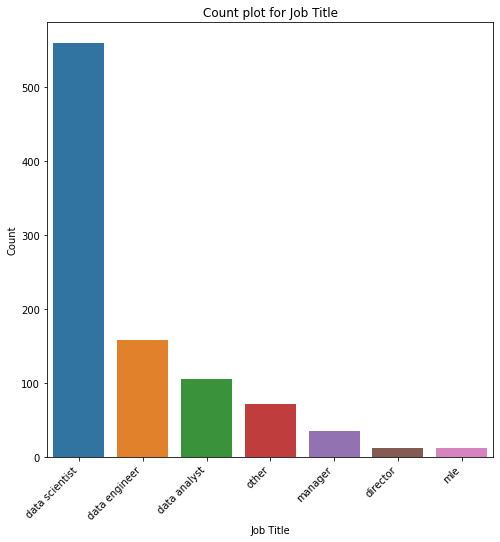

In [61]:
plt.figure(figsize=(8,8))
g = sns.countplot(x='job_title', data= glassdoor_df, order = glassdoor_df['job_title'].value_counts().index)
p = plt.title('Count plot for Job Title')
p = plt.xlabel('Job Title')
p = plt.ylabel('Count')
p = g.set_xticklabels(g.get_xticklabels(), rotation=45, horizontalalignment='right')

In [62]:
# Lets Check the seniority has high value employers
def title_seniority(title):
    if 'senior' in title.lower() or 'sr.' in title.lower() or 'lead' in title.lower() or 'principal' in title.lower():
        return 'sr'
    elif 'junior' in title.lower() or 'jr.' in title.lower():
        return 'jr'
    else:
        return 'other'

glassdoor_df['job_seniority'] = glassdoor_df['Job Title'].apply(title_seniority)
glassdoor_df['job_seniority'].value_counts()

other    701
sr       252
jr         3
Name: job_seniority, dtype: int64

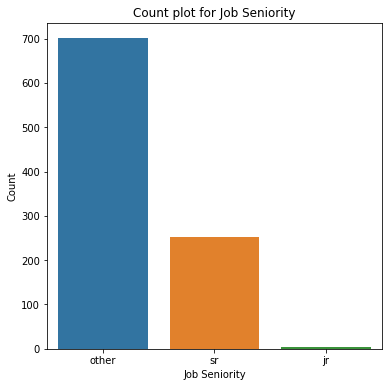

In [63]:
plt.figure(figsize=(6,6))
g = sns.countplot(x='job_seniority', data= glassdoor_df, order = glassdoor_df['job_seniority'].value_counts().index)
p = plt.title('Count plot for Job Seniority')
p = plt.xlabel('Job Seniority')
p = plt.ylabel('Count')

In [64]:
# Remove the Job Title Column 
glassdoor_df.drop(labels = ['Job Title'], axis=1 ,inplace =True)

In [66]:
glassdoor_df["Salary Estimate"].value_counts().unique

<bound method Series.unique of -1                                  214
$86K-$143K (Glassdoor est.)           6
$54K-$115K (Glassdoor est.)           6
$49K-$113K (Glassdoor est.)           6
$21-$34 Per Hour(Glassdoor est.)      6
                                   ... 
$74K-$119K (Glassdoor est.)           1
$55K-$97K (Glassdoor est.)            1
$15K-$16K(Employer est.)              1
$61K-$106K (Glassdoor est.)           1
$62K-$113K (Glassdoor est.)           1
Name: Salary Estimate, Length: 417, dtype: int64>

In [67]:
# Cleaning Salary Estimate column
salary = glassdoor_df['Salary Estimate'].apply(lambda x: x.split("(")[0])
salary

0       $53K-$91K 
1      $63K-$112K 
2       $80K-$90K 
3       $56K-$97K 
4      $86K-$143K 
          ...     
951    $72K-$133K 
952     $56K-$91K 
953    $95K-$160K 
954             -1
955    $61K-$126K 
Name: Salary Estimate, Length: 956, dtype: object

In [68]:
salary.value_counts()

-1                  214
$86K-$143K            6
$54K-$115K            6
$49K-$113K            6
$21-$34 Per Hour      6
                   ... 
$74K-$119K            1
$55K-$97K             1
$15K-$16K             1
$61K-$106K            1
$62K-$113K            1
Name: Salary Estimate, Length: 417, dtype: int64

In [69]:
salary = salary.apply(lambda x: np.NaN if x=='-1' else x)
salary

0       $53K-$91K 
1      $63K-$112K 
2       $80K-$90K 
3       $56K-$97K 
4      $86K-$143K 
          ...     
951    $72K-$133K 
952     $56K-$91K 
953    $95K-$160K 
954            NaN
955    $61K-$126K 
Name: Salary Estimate, Length: 956, dtype: object

In [70]:
# Removing '$' and 'K' from 'Salary Estimate' column
salary = salary.apply(lambda x: x if type(x)== type(3.5) else x.replace('$','').replace('K',''))
salary

0       53-91 
1      63-112 
2       80-90 
3       56-97 
4      86-143 
        ...   
951    72-133 
952     56-91 
953    95-160 
954        NaN
955    61-126 
Name: Salary Estimate, Length: 956, dtype: object

In [71]:
# Finding any inconsistencies in the salary
print("Length of Salary: ",len(salary.unique()))
salary.unique()[380:]

Length of Salary:  417


array(['42-79 ', '84-153 ', '44-73 ', '40-87 ', '72-142 ', '74-137 ',
       '57-109 ', '136-208 ', '171-272 ', '65-126 ', '118-228 ',
       '113-182 ', '58-104 ', '58-108 ', '81-161 ', '115-220 ', '71-144 ',
       '32-57 ', '79-136 ', '48-113 ', '27-47 Per Hour', '68-125 ',
       '39-67 ', '71-135 ', '61-123 ', '87-141 ', '71-121 ', '72-121 ',
       '51-88 ', '101-141 ', '79-127 ', '81-132 ',
       'Employer Provided Salary:120-140', '65-113 ', '59-125 ',
       '80-142 ', '62-113 '], dtype=object)

In [72]:
# Removing the string employer provided salary from salary array
salary = salary.apply(lambda x: x if type(x)==type(3.5) else x.lower().replace("employer provided salary:", ""))
salary.unique()[380:]

array(['42-79 ', '84-153 ', '44-73 ', '40-87 ', '72-142 ', '74-137 ',
       '57-109 ', '136-208 ', '171-272 ', '65-126 ', '118-228 ',
       '113-182 ', '58-104 ', '58-108 ', '81-161 ', '115-220 ', '71-144 ',
       '32-57 ', '79-136 ', '48-113 ', '27-47 per hour', '68-125 ',
       '39-67 ', '71-135 ', '61-123 ', '87-141 ', '71-121 ', '72-121 ',
       '51-88 ', '101-141 ', '79-127 ', '81-132 ', '120-140', '65-113 ',
       '59-125 ', '80-142 ', '62-113 '], dtype=object)

In [73]:
# Converting per hour salaries to per year salaries
def hourly_to_yearly(minlimit, maxlimit):
  x = minlimit.strip()
  y = maxlimit.strip()
  x = int(int(minlimit)*45*52/1000)
  y = int(int(maxlimit)*45*52/1000)
  return '{}-{}'.format(x,y)

salary = salary.apply(lambda x: x if type(x)==type(3.5) else (hourly_to_yearly(x.lower().replace("per hour", "").split('-')[0], x.lower().replace("per hour", "").split('-')[1]) if "per hour" in x.lower() else x))
salary.unique()[:38]

array(['53-91 ', '63-112 ', '80-90 ', '56-97 ', '86-143 ', '71-119 ',
       '54-93 ', '86-142 ', '38-84 ', '120-160 ', '126-201 ', '64-106 ',
       '106-172 ', '46-85 ', '83-144 ', '102-190 ', '67-137 ', '118-189 ',
       '110-175 ', '64-111 ', '81-130 ', '73-119 ', '86-139 ', '63-105 ',
       nan, '109-177 ', '63-110 ', '75-124 ', '34-61 ', '72-120 ',
       '93-149 ', '85-140 ', '77-135 ', '82-132 ', '83-137 ', '115-180 ',
       '74-138 ', '64-112 '], dtype=object)

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


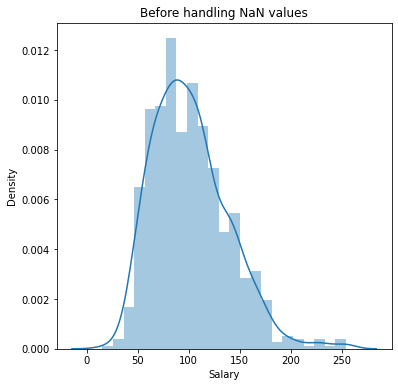

In [75]:
# Creating column for salary i.e. average of the range
glassdoor_df['Salary'] = salary.apply(lambda x:  x if type(x)==type(3.5) else (int(x.split("-")[0]) + int(x.split("-")[1].strip()))/2)

plt.figure(figsize=(6,6))
g = sns.distplot(a=glassdoor_df['Salary'])
p = plt.title('Before handling NaN values')

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


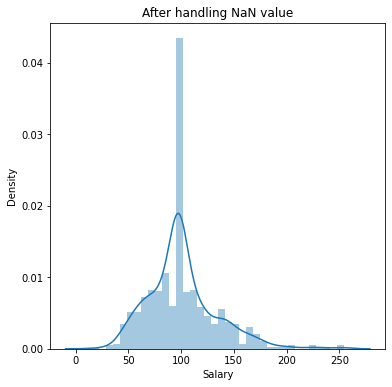

In [76]:
# Handling NaN values in Salary column
glassdoor_df['Salary'] = glassdoor_df['Salary'].fillna(glassdoor_df['Salary'].median())

plt.figure(figsize=(6,6))
g = sns.distplot(a=glassdoor_df['Salary'])
p = plt.title('After handling NaN value')

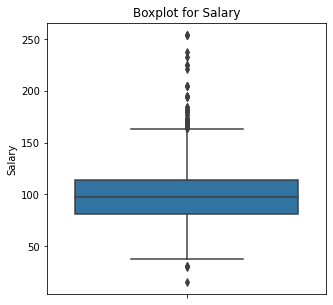

In [106]:
# Outliers in Salary
plt.figure(figsize=(5,5))
g = sns.boxplot(y='Salary', data= glassdoor_df, orient='v')
p = plt.title('Boxplot for Salary')
p = plt.ylabel('Salary')

In [78]:
# Cleaning Company Name column
glassdoor_df["Company Name"] = glassdoor_df['Company Name'].apply(lambda x: x.split("\n")[0])

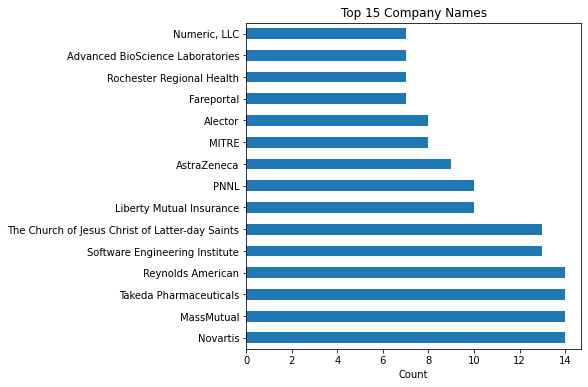

In [79]:
plt.figure(figsize=(6,6))
g = glassdoor_df["Company Name"].value_counts().nlargest(15).plot(kind='barh')
p = plt.title('Top 15 Company Names')
p = plt.xlabel('Count')

In [80]:
# Creating a column 'job_state'
glassdoor_df['job_location'] = glassdoor_df['Location'].apply(lambda x: x if ',' not in x else x.split(',')[1].strip())
print('Total number of unique locations: {}'.format(len(glassdoor_df['job_location'].unique())))

Total number of unique locations: 46


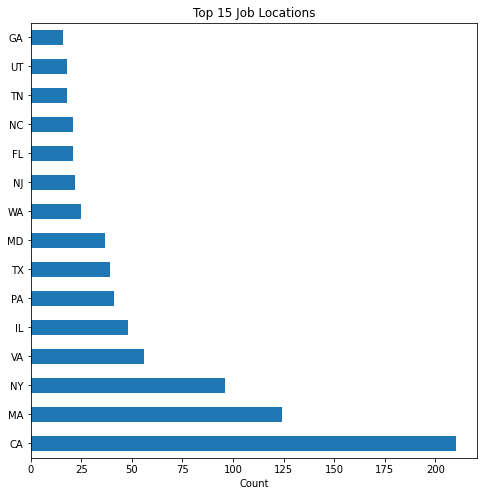

In [81]:
plt.figure(figsize=(8,8))
g = glassdoor_df["job_location"].value_counts().nlargest(15).plot(kind='barh')
p = plt.title('Top 15 Job Locations')
p = plt.xlabel('Count')

In [82]:
glassdoor_df['Size'].value_counts()

1001 to 5000 employees     177
201 to 500 employees       160
51 to 200 employees        155
10000+ employees           154
501 to 1000 employees      144
5001 to 10000 employees     79
1 to 50 employees           61
Unknown                     15
-1                          11
Name: Size, dtype: int64

In [84]:
# Cleaning 'Size' column
def size_simplifier(text):
  if '-1' in text.lower():
    return 'Unknown'
  else:
    return text

glassdoor_df['Size'] = glassdoor_df['Size'].apply(size_simplifier)

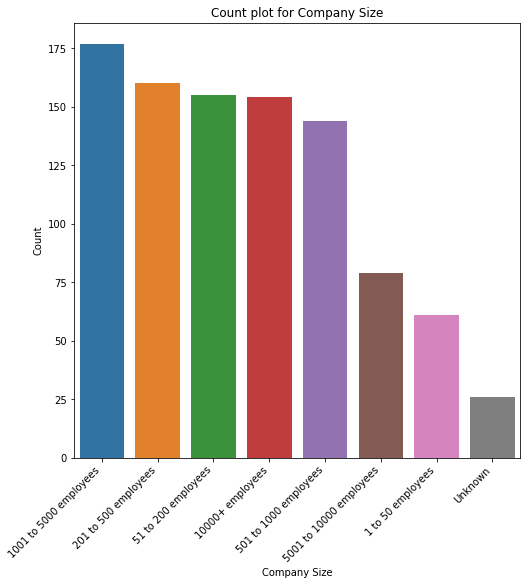

In [86]:
plt.figure(figsize=(8,8))
g = sns.countplot(x='Size', data=glassdoor_df, order = glassdoor_df['Size'].value_counts().index)
p = plt.title('Count plot for Company Size')
p = plt.xlabel('Company Size')
p = plt.ylabel('Count')
p = g.set_xticklabels(g.get_xticklabels(), rotation=45, horizontalalignment='right')

In [87]:
glassdoor_df['Type of ownership'].value_counts()

Company - Private                 532
Company - Public                  237
Nonprofit Organization             65
Subsidiary or Business Segment     40
Government                         17
Hospital                           15
College / University               15
Unknown                            11
-1                                 11
Other Organization                  5
Contract                            5
School / School District            2
Private Practice / Firm             1
Name: Type of ownership, dtype: int64

In [88]:
def ownership_simplifier(text):
    if 'private' in text.lower():
      return 'Private'
    elif 'public' in text.lower():
      return 'Public'
    elif ('-1' in text.lower()) or ('unknown' in text.lower()) or ('school / school district' in text.lower()) or ('private practice / firm' in text.lower()) or ('contract' in text.lower()) :
      return 'Other Organization'
    else:
      return text

glassdoor_df['Type of ownership'] = glassdoor_df['Type of ownership'].apply(ownership_simplifier)

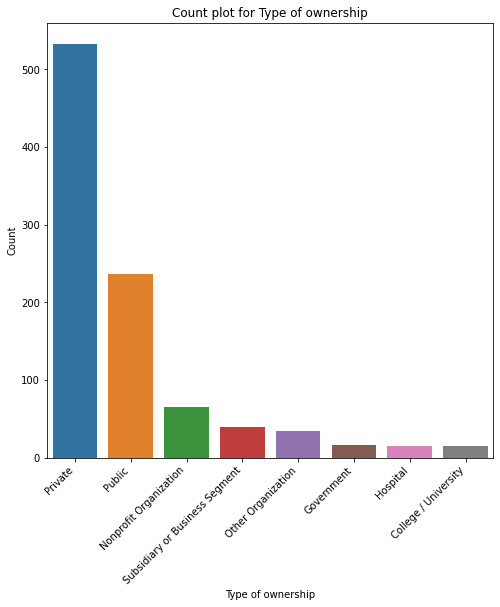

In [90]:
plt.figure(figsize=(8,8))
g = sns.countplot(x='Type of ownership', data=glassdoor_df, order = glassdoor_df['Type of ownership'].value_counts().index)
p = plt.title('Count plot for Type of ownership')
p = plt.xlabel('Type of ownership')
p = plt.ylabel('Count')
p = g.set_xticklabels(g.get_xticklabels(), rotation=45, horizontalalignment='right')

In [91]:
# Cleaning 'Industry' column
glassdoor_df['Industry'].value_counts()

Biotech & Pharmaceuticals                   148
IT Services                                  77
Computer Hardware & Software                 70
Insurance Carriers                           65
Enterprise Software & Network Solutions      56
                                           ... 
Farm Support Services                         1
Transportation Equipment Manufacturing        1
Motion Picture Production & Distribution      1
Other Retail Stores                           1
Beauty & Personal Accessories Stores          1
Name: Industry, Length: 63, dtype: int64

In [92]:
glassdoor_df['Industry'] = glassdoor_df['Industry'].apply(lambda x: 'Others' if x=='-1' else x)

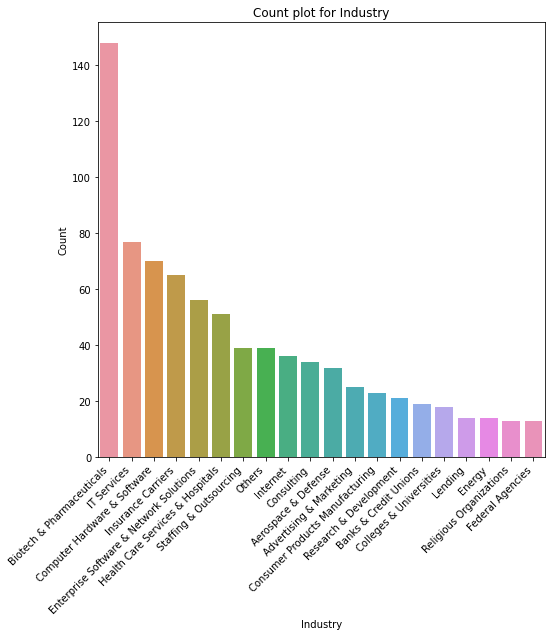

In [95]:
plt.figure(figsize=(8,8))
g = sns.countplot(x='Industry', data=glassdoor_df, order = glassdoor_df['Industry'].value_counts()[:20].index)
p = plt.title('Count plot for Industry')
p = plt.xlabel('Industry')
p = plt.ylabel('Count')
p = g.set_xticklabels(g.get_xticklabels(), rotation=45, horizontalalignment='right')

In [96]:
glassdoor_df['Sector'].value_counts()

Information Technology                239
Biotech & Pharmaceuticals             148
Business Services                     134
Insurance                              71
Finance                                56
Health Care                            51
Manufacturing                          40
-1                                     39
Aerospace & Defense                    32
Education                              26
Retail                                 16
Non-Profit                             16
Oil, Gas, Energy & Utilities           15
Media                                  13
Government                             13
Transportation & Logistics              8
Real Estate                             8
Travel & Tourism                        8
Telecommunications                      6
Arts, Entertainment & Recreation        4
Construction, Repair & Maintenance      4
Consumer Services                       4
Mining & Metals                         3
Agriculture & Forestry            

In [97]:
glassdoor_df['Sector'] = glassdoor_df['Sector'].apply(lambda x: 'Others' if x=='-1' else x)

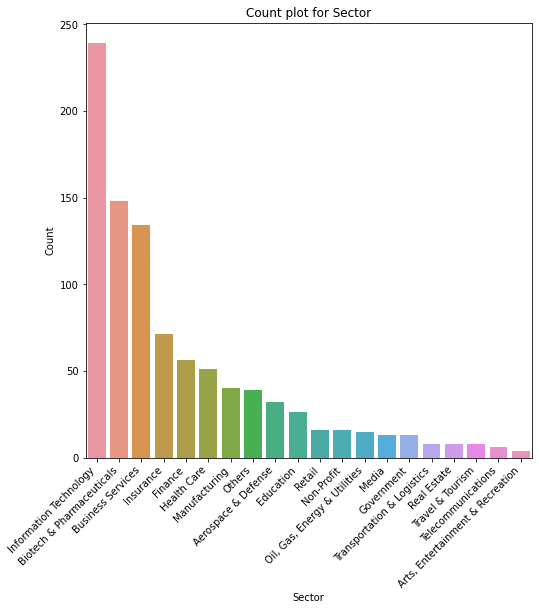

In [98]:
plt.figure(figsize=(8,8))
g = sns.countplot(x='Sector', data=glassdoor_df, order = glassdoor_df['Sector'].value_counts()[:20].index)
p = plt.title('Count plot for Sector')
p = plt.xlabel('Sector')
p = plt.ylabel('Count')
p = g.set_xticklabels(g.get_xticklabels(), rotation=45, horizontalalignment='right')

In [99]:
glassdoor_df['Revenue'].value_counts()

Unknown / Non-Applicable            299
$10+ billion (USD)                  140
$100 to $500 million (USD)          107
$1 to $2 billion (USD)               68
$500 million to $1 billion (USD)     62
$25 to $50 million (USD)             59
$50 to $100 million (USD)            52
$2 to $5 billion (USD)               44
$10 to $25 million (USD)             39
$5 to $10 million (USD)              29
$5 to $10 billion (USD)              20
$1 to $5 million (USD)               17
-1                                   11
Less than $1 million (USD)            9
Name: Revenue, dtype: int64

In [100]:
def revenue_simplifier(text):
  if '-1' in text.lower():
    return 'Unknown / Non-Applicable'
  else:
    return text

glassdoor_df['Revenue'] = glassdoor_df['Revenue'].apply(revenue_simplifier)

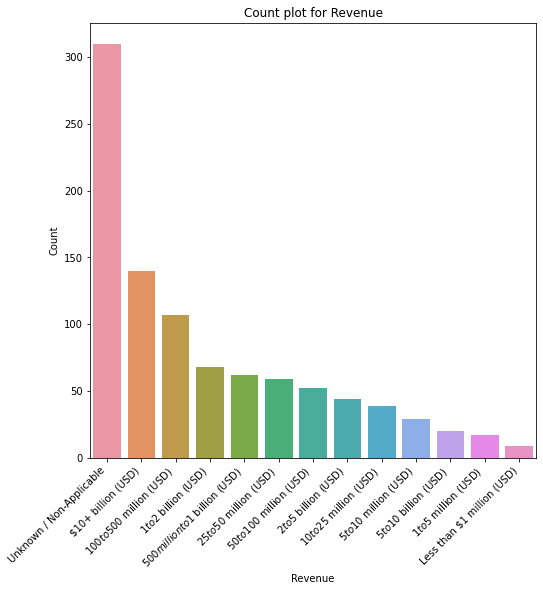

In [101]:
plt.figure(figsize=(8,8))
g = sns.countplot(x='Revenue', data=glassdoor_df, order = glassdoor_df['Revenue'].value_counts().index)
p = plt.title('Count plot for Revenue')
p = plt.xlabel('Revenue')
p = plt.ylabel('Count')
p = g.set_xticklabels(g.get_xticklabels(), rotation=45, horizontalalignment='right')

In [103]:
glassdoor_df['Competitors'] = glassdoor_df['Competitors'].apply(lambda x: len(x.split(',')) if x != '-1' else 0)

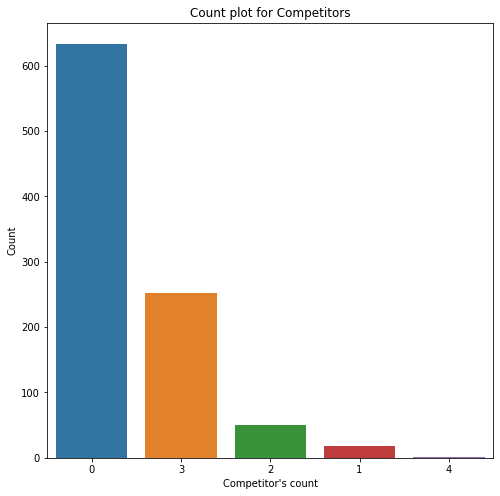

In [105]:
plt.figure(figsize=(8,8))
g = sns.countplot(x='Competitors', data=glassdoor_df, order = glassdoor_df['Competitors'].value_counts().index)
p = plt.title('Count plot for Competitors')
p = plt.xlabel("Competitor's count")
p = plt.ylabel('Count')

<ipython-input-108-1e3a0ae370be>:8: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.triu(np.ones_like(corr, dtype=np.bool))


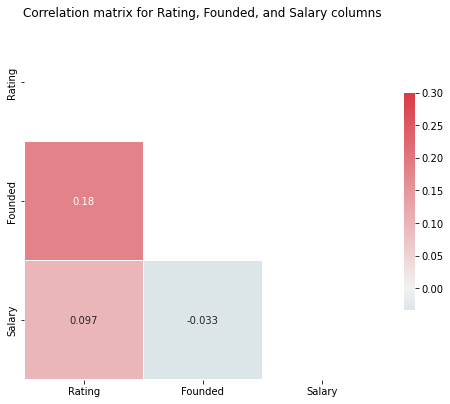

In [108]:
# Finding and plotting the correlation between numerical features

cmap = sns.diverging_palette(220, 10, as_cmap=True)
plt.figure(figsize=(8,8))
corr = glassdoor_df[['Rating','Founded','Salary']].corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=np.bool))

g = sns.heatmap(corr, mask=mask, vmax=0.3, center=0, cmap=cmap, square=True, annot=True, linewidths=0.05, cbar_kws={"shrink": .5})
p = plt.title('Correlation matrix for Rating, Founded, and Salary columns')

In [109]:
# Creating column of 'job_in_headquarters'
glassdoor_df['job_in_headquarters'] = glassdoor_df.apply(lambda x: 1 if x['Location'] == x['Headquarters'] else 0, axis=1)

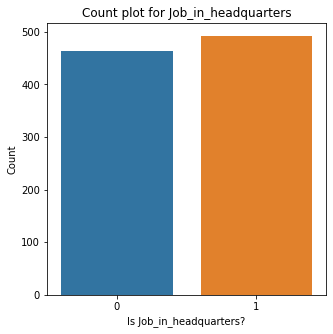

In [110]:
plt.figure(figsize=(5,5))
g = sns.countplot(x='job_in_headquarters', data=glassdoor_df)
p = plt.title('Count plot for Job_in_headquarters')
p = plt.xlabel("Is Job_in_headquarters?")
p = plt.ylabel('Count')

In [111]:
glassdoor_df.drop(labels=['Location'], axis=1, inplace=True)

In [112]:
# Creating columns of 'python, excel, sql, tableau' jobs
glassdoor_df['python_job'] = glassdoor_df['Job Description'].apply(lambda x: 1 if 'python' in x.lower() else 0)
glassdoor_df['excel_job'] = glassdoor_df['Job Description'].apply(lambda x: 1 if 'excel' in x.lower() else 0)
glassdoor_df['sql_job'] = glassdoor_df['Job Description'].apply(lambda x: 1 if 'sql' in x.lower() else 0)
glassdoor_df['tableau_job'] = glassdoor_df['Job Description'].apply(lambda x: 1 if 'tableau' in x.lower() else 0)

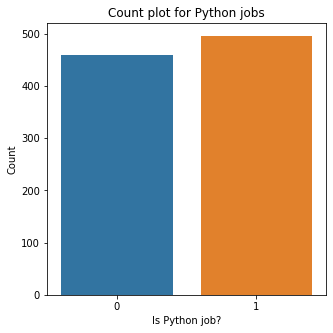

In [113]:
plt.figure(figsize=(5,5))
g = sns.countplot(x='python_job', data=glassdoor_df)
p = plt.title('Count plot for Python jobs')
p = plt.xlabel("Is Python job?")
p = plt.ylabel('Count')

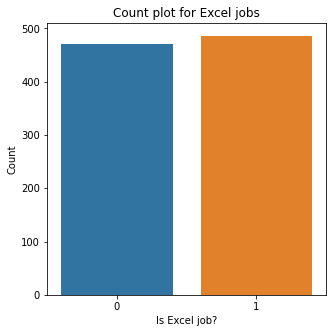

In [115]:
plt.figure(figsize=(5,5))
g = sns.countplot(x='excel_job', data=glassdoor_df)
p = plt.title('Count plot for Excel jobs')
p = plt.xlabel("Is Excel job?")
p = plt.ylabel('Count')

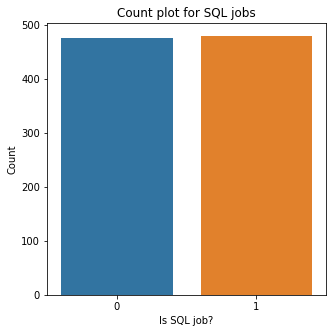

In [116]:
plt.figure(figsize=(5,5))
g = sns.countplot(x='sql_job', data=glassdoor_df)
p = plt.title('Count plot for SQL jobs')
p = plt.xlabel("Is SQL job?")
p = plt.ylabel('Count')

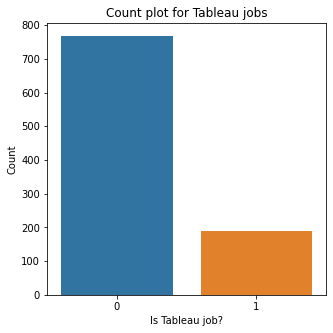

In [117]:
plt.figure(figsize=(5,5))
g = sns.countplot(x='tableau_job', data=glassdoor_df)
p = plt.title('Count plot for Tableau jobs')
p = plt.xlabel("Is Tableau job?")
p = plt.ylabel('Count')

In [118]:
glassdoor_df.drop(labels=['Job Description'], axis=1, inplace=True)

In [120]:
# Trimming the 'Sector' column

# Taking top 9 Sector and replacing remaining by 'Others'
sector_list = list(glassdoor_df['Sector'].value_counts()[:10].index)

def sector_simplifier(text):
  if text not in sector_list:
    return 'Others'
  else:
    return text

glassdoor_df['Sector'] = glassdoor_df['Sector'].apply(sector_simplifier)

In [121]:
glassdoor_df['Sector'].value_counts()

Information Technology       239
Others                       159
Biotech & Pharmaceuticals    148
Business Services            134
Insurance                     71
Finance                       56
Health Care                   51
Manufacturing                 40
Aerospace & Defense           32
Education                     26
Name: Sector, dtype: int64

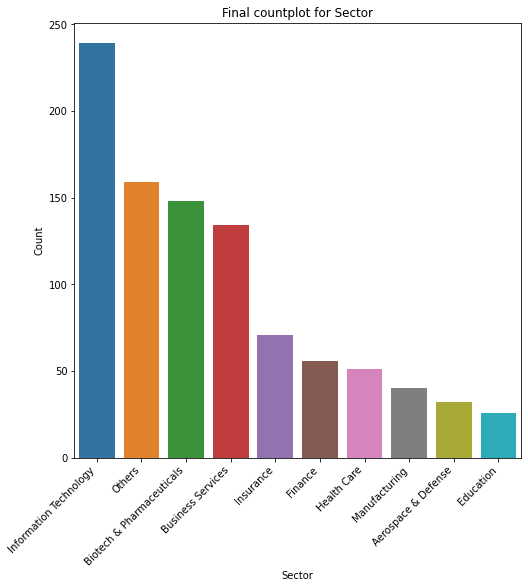

In [123]:
plt.figure(figsize=(8,8))
g = sns.countplot(x='Sector', data=glassdoor_df, order = glassdoor_df['Sector'].value_counts().index)
p = plt.title('Final countplot for Sector')
p = plt.xlabel('Sector')
p = plt.ylabel('Count')
p = g.set_xticklabels(g.get_xticklabels(), rotation=45, horizontalalignment='right')

In [125]:
# Trimming the 'job_location' column

# Taking top 9 States and replacing others by 'Others'
job_location_list = list(glassdoor_df['job_location'].value_counts()[:9].index)

def job_location_simplifier(text):
  if text not in job_location_list:
    return 'Others'
  else:
    return text

glassdoor_df['job_location'] = glassdoor_df['job_location'].apply(job_location_simplifier)

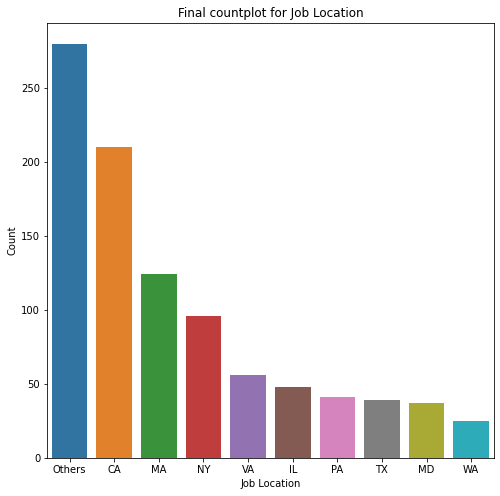

In [126]:
plt.figure(figsize=(8,8))
g = sns.countplot(x='job_location', data=glassdoor_df, order = glassdoor_df['job_location'].value_counts().index)
p = plt.title('Final countplot for Job Location')
p = plt.xlabel('Job Location')
p = plt.ylabel('Count')

In [127]:
glassdoor_df.drop(labels=['Salary Estimate', 'Company Name', 'Headquarters', 'Industry', 'job_location'], axis=1, inplace=True)

In [129]:
# Renaming columns
glassdoor_df.rename(columns={'Rating':'company_rating', 'Size':'company_size', 'Founded':'company_founded', 'Type of ownership':'type_of_ownership',
                   'Sector':'sector', 'Revenue':'revenue', 'Competitors':'competitors', 'Salary': 'salary'}, inplace=True)


In [131]:
# Mapping ranks to 'company_size' column
size_map = {'Unknown': 0, '1 to 50 employees': 1, '51 to 200 employees': 2, '201 to 500 employees': 3,
            '501 to 1000 employees': 4, '1001 to 5000 employees': 5, '5001 to 10000 employees': 6, '10000+ employees': 7}

glassdoor_df['company_size'] = glassdoor_df['company_size'].map(size_map)


In [132]:
# Mapping ranks to 'revenue	' column
revenue_map = {'Unknown / Non-Applicable': 0, 'Less than $1 million (USD)': 1, '$1 to $5 million (USD)': 2, '$5 to $10 million (USD)': 3,
            '$10 to $25 million (USD)': 4, '$25 to $50 million (USD)': 5, '$50 to $100 million (USD)': 6, '$100 to $500 million (USD)': 7,
            '$500 million to $1 billion (USD)': 8, '$1 to $2 billion (USD)': 9, '$2 to $5 billion (USD)':10, '$5 to $10 billion (USD)':11,
            '$10+ billion (USD)':12}

glassdoor_df['revenue'] = glassdoor_df['revenue'].map(revenue_map)

In [133]:
# Mapping ranks to 'job_seniority	' column
job_seniority_map = {'other': 0, 'jr': 1, 'sr': 2}

glassdoor_df['job_seniority'] = glassdoor_df['job_seniority'].map(job_seniority_map)

In [139]:
# Removing 'type_of_ownership' column using get_dummies()

glassdoor_df = pd.get_dummies(columns=['type_of_ownership'], data=glassdoor_df, prefix='ownership')
glassdoor_df = pd.get_dummies(columns=['sector'], data=glassdoor_df)
glassdoor_df = pd.get_dummies(columns=['job_title'], data=glassdoor_df)#

In [140]:
glassdoor_df.shape

(956, 37)

In [141]:
glassdoor_df.head()

,company_rating,company_size,company_founded,revenue,competitors,job_seniority,salary,job_in_headquarters,python_job,excel_job,...,sector_Insurance,sector_Manufacturing,sector_Others,job_title_data analyst,job_title_data engineer,job_title_data scientist,job_title_director,job_title_manager,job_title_mle,job_title_other
0,3.8,4,1973,6,0,0,72.0,0,1,1,...,0,0,0,0,0,1,0,0,0,0
1,3.4,7,1984,10,0,0,87.5,0,1,0,...,0,0,0,0,0,1,0,0,0,0
2,4.8,4,2010,7,0,0,85.0,1,1,1,...,0,0,0,0,0,1,0,0,0,0
3,3.8,5,1965,8,3,0,76.5,1,1,0,...,0,0,1,0,0,1,0,0,0,0
4,2.9,2,1998,0,3,0,114.5,1,1,1,...,0,0,0,0,0,1,0,0,0,0
